# Importing Libraries

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [71]:
df=pd.read_csv('data/heart.xls')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# Preprocessing

In [72]:
scaled_columns=['age','trestbps','chol','thalach','oldpeak'] # picking columns to scale

## Normalising numerical Data

In [73]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df[scaled_columns]=scaler.fit_transform(df[scaled_columns])

## Splitting data into target and feature

In [74]:
X= df.drop('target',axis=1)
y=df['target']

# Splitting Dataset into training and testing Data

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Decision Tree Classifier Model

## Training and Visualising

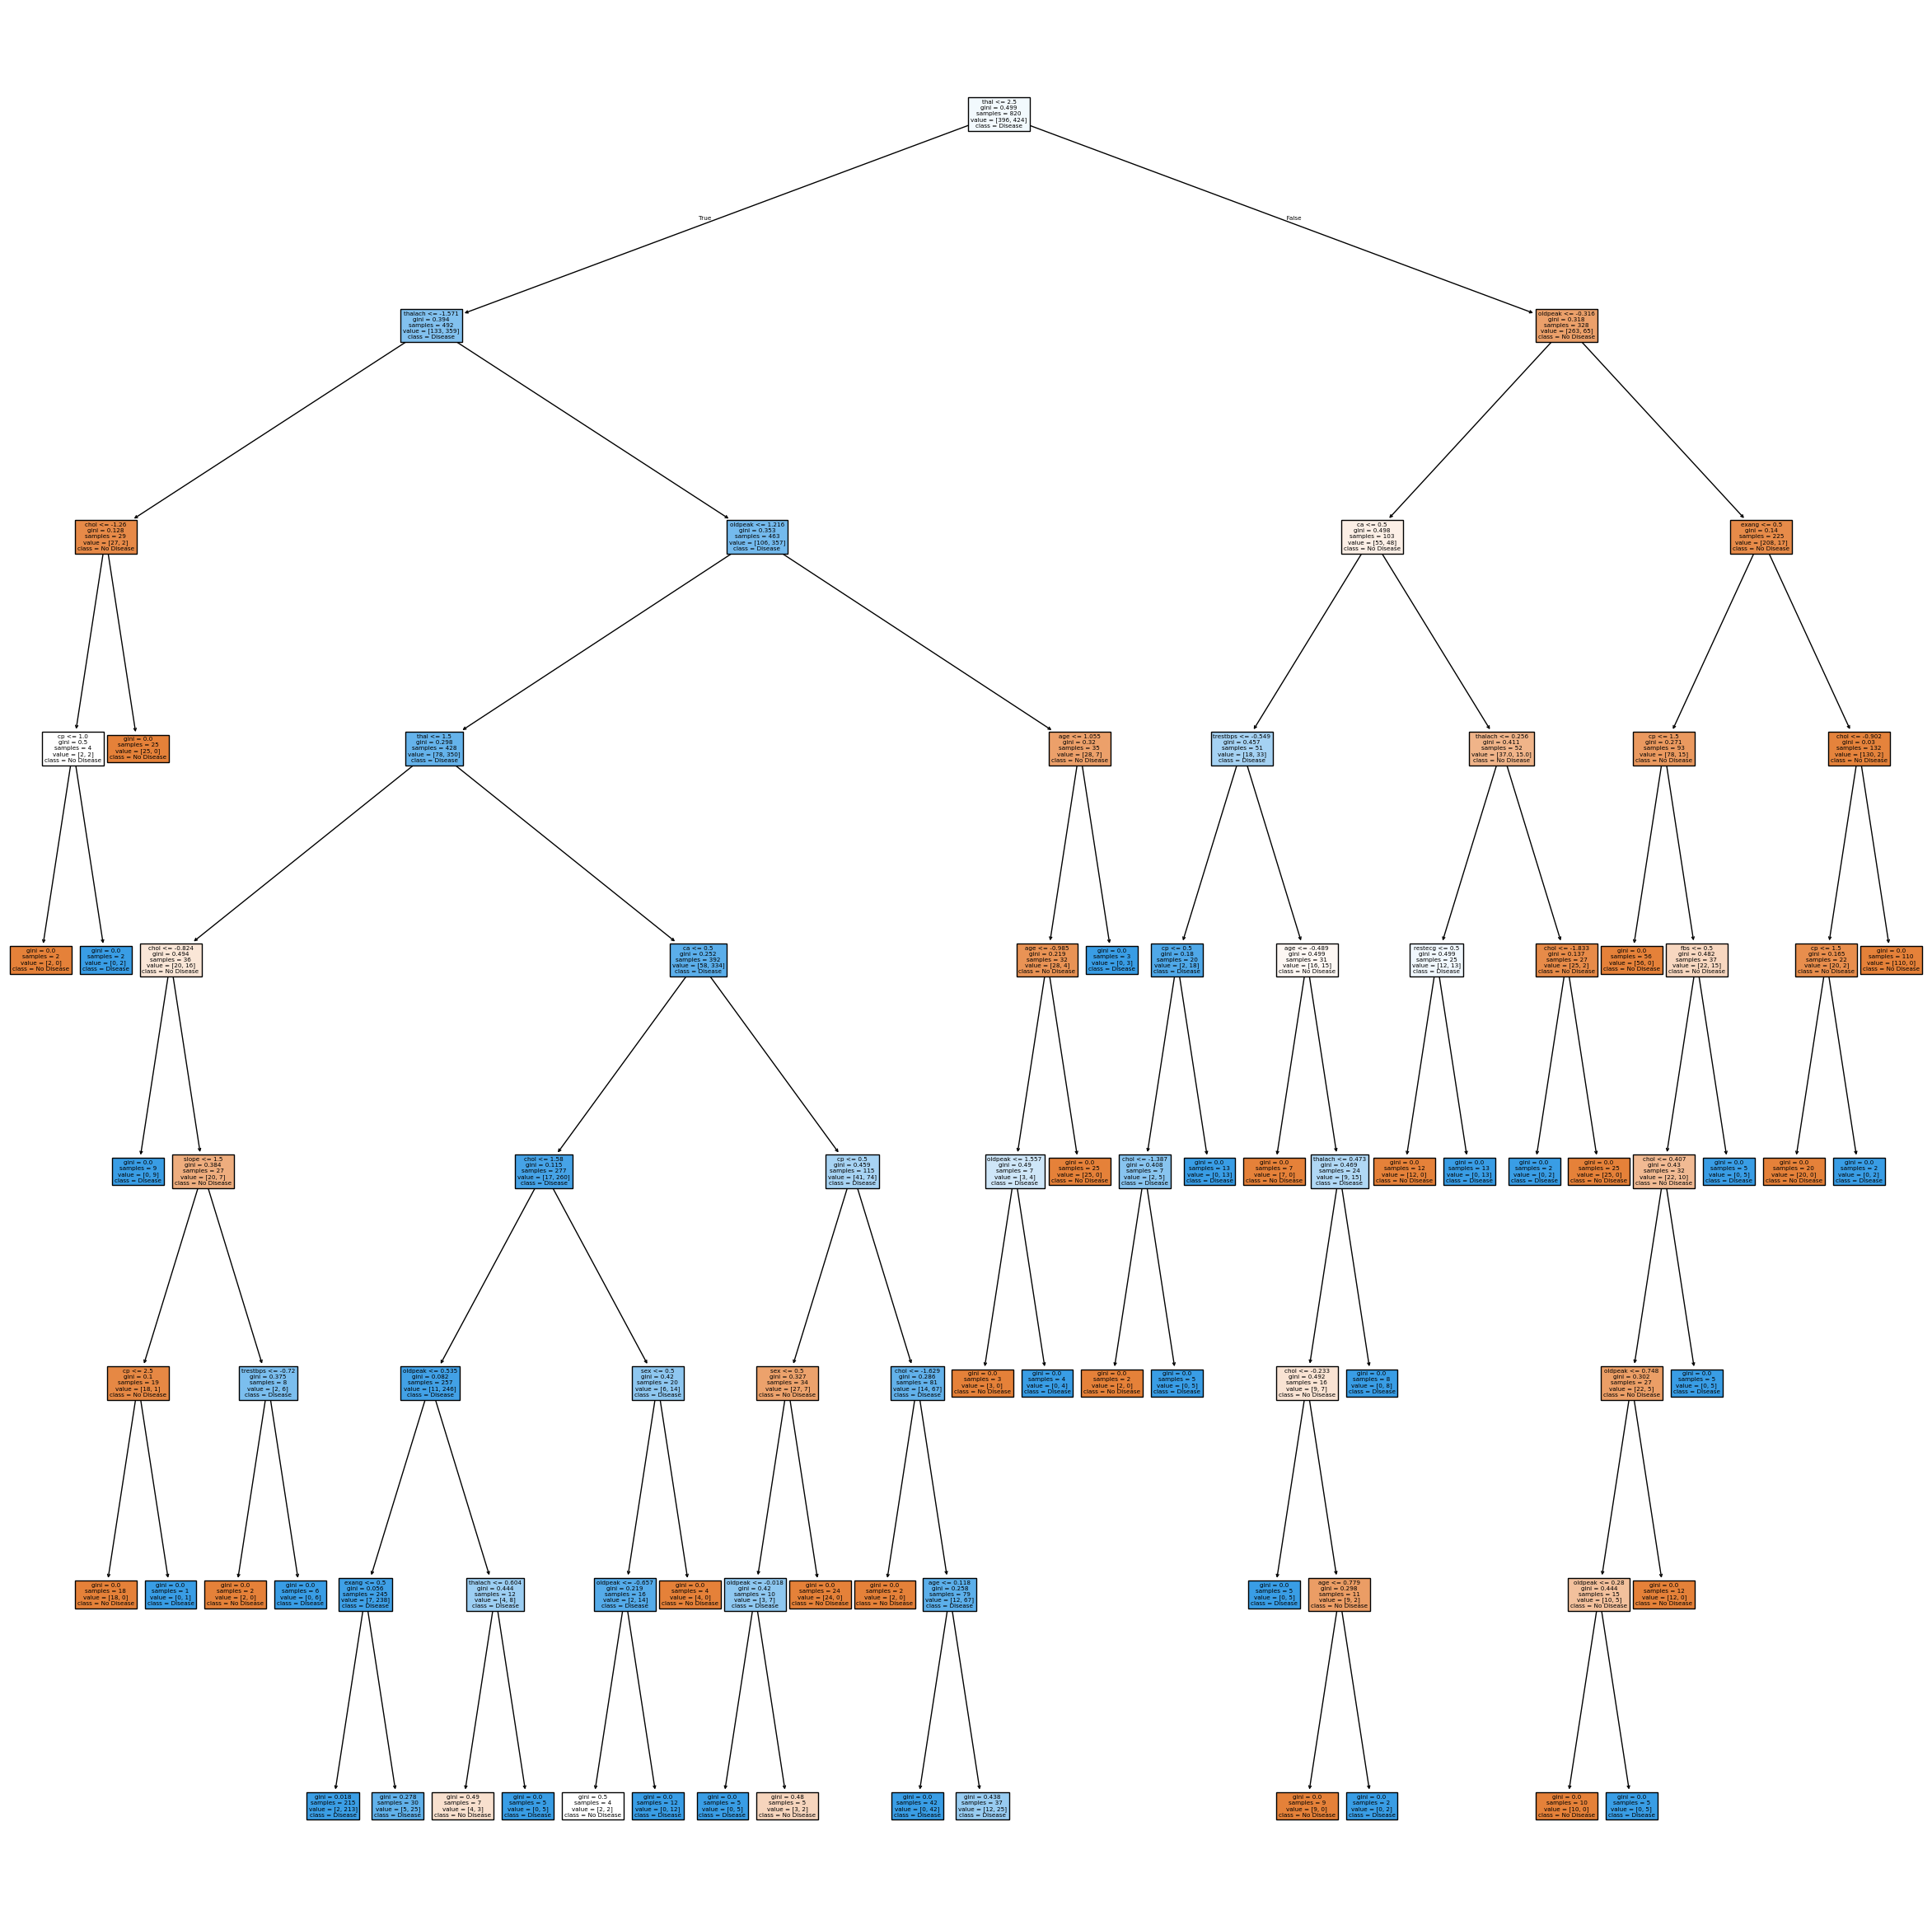

In [76]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt = DecisionTreeClassifier(max_features=6,criterion="gini",max_depth=8) #putting optimal values after cross validation
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

plt.figure(figsize=(30,30))
plot_tree(dt, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.show()

## Evaluating performance

In [77]:
from sklearn.metrics import classification_report
classrep=classification_report(y_test,y_pred)
print(classrep)

              precision    recall  f1-score   support

           0       0.98      0.84      0.91       103
           1       0.86      0.98      0.92       102

    accuracy                           0.91       205
   macro avg       0.92      0.91      0.91       205
weighted avg       0.92      0.91      0.91       205



## Cross Validation and finding optimal parameters for Dtrees

In [78]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_features': [4,6, 8, 10],
    'max_depth': [4,5, 6,7, 8,9, 10]
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid.fit(X, y)

print("Best parameters:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)

Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 10}
Best CV accuracy: 0.9960975609756098


# Random Forest Classifier

## Training model

In [79]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=5) #n_estimators value placed after cross validation
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

## Evaluating performance

In [80]:
classrep_rf = classification_report(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {classrep_rf}")

Random Forest Accuracy:               precision    recall  f1-score   support

           0       0.99      0.98      0.99       103
           1       0.98      0.99      0.99       102

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



## Cross Validation and finding optimal parameters
### For Random Forests

In [81]:
n_estimator_values = [10, 25, 40, 50]
cv_scores = []

for n in n_estimator_values:
    rf = RandomForestClassifier(n_estimators=n)
    scores = cross_val_score(rf, X, y, cv=5)
    cv_scores.append(scores.mean())
    print(f"n_estimators={n}, Mean CV Accuracy={scores.mean():.4f}")

n_estimators=10, Mean CV Accuracy=0.9883
n_estimators=25, Mean CV Accuracy=0.9941
n_estimators=40, Mean CV Accuracy=0.9941
n_estimators=50, Mean CV Accuracy=0.9971


## Feature Importances

In [ ]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature importances for random forest model:")
for i in indices:
    print(f"{X.columns[i]}: {importances[i]:.4f}")

Feature Importances for random forest model:
cp: 0.2030
oldpeak: 0.1090
thal: 0.1073
thalach: 0.1050
ca: 0.0949
age: 0.0801
chol: 0.0770
trestbps: 0.0656
exang: 0.0520
slope: 0.0461
sex: 0.0330
restecg: 0.0180
fbs: 0.0089


Corresponding importance of each feature towards the Random forest model